In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AvgPool2D, Conv2D, MaxPooling2D, Dropout, Dense, Input, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import os


In [3]:
print(os.listdir("C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images"))

['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macaron

In [5]:
values = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', '.DS_Store', 'huevos_rancheros', 'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']
values.sort()
values = values[1:]
print(values)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [7]:
cal = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = cal.splitlines()
cal = "These values are based on factors such as ingredients "

In [9]:
calories[10]

'Bruschetta: ~1 calorie per gram'

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data = train_datagen.flow_from_directory('C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images',
                                               target_size=(224,224),
                                               batch_size= 64,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images',
                                               target_size=(224,224),
                                               batch_size= 64,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


In [13]:
class_indices = train_data.class_indices
class_names = list(class_indices.keys())
print("Class names:", class_names)

Class names: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macaron

In [15]:
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from Convolutional layers
model.add(Flatten())

# Add Fully Connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))  # Output layer with softmax activation for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
          

C:\Users\Soundous\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,
    validation_data=train_data,
    validation_steps=train_data.samples // train_data.batch_size
)

C:\Users\Soundous\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 2310s 2s/step - accuracy: 0.0115 - loss: 4.6286 - val_accuracy: 0.0303 - val_loss: 4.4441
Epoch 2/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 121us/step - accuracy: 0.0469 - loss: 4.4453 - val_accuracy: 0.0500 - val_loss: 4.4400
Epoch 3/10


C:\Users\Soundous\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1420/1420 ━━━━━━━━━━━━━━━━━━━━ 2266s 2s/step - accuracy: 0.0316 - loss: 4.4396 - val_accuracy: 0.0706 - val_loss: 4.1723
Epoch 4/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 90us/step - accuracy: 0.1094 - loss: 4.2842 - val_accuracy: 0.0000e+00 - val_loss: 4.0703
Epoch 5/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 2252s 2s/step - accuracy: 0.0709 - loss: 4.1308 - val_accuracy: 0.1511 - val_loss: 3.6889
Epoch 6/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 98us/step - accuracy: 0.1094 - loss: 3.6802 - val_accuracy: 0.3000 - val_loss: 3.3610
Epoch 7/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 2249s 2s/step - accuracy: 0.1177 - loss: 3.8223 - val_accuracy: 0.2208 - val_loss: 3.3790
Epoch 8/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 90us/step - accuracy: 0.0469 - loss: 3.8859 - val_accuracy: 0.4500 - val_loss: 2.9114
Epoch 9/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 2245s 2s/step - accuracy: 0.1635 - loss: 3.5209 - val_accuracy: 0.3091 - val_loss: 2.9820
Epoch 10/10
1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 90us/step - accuracy: 0.1406 - loss: 3.6

In [19]:
def plot_training_history(history, filename='training_history.png'):
    plt.figure()
    plt.plot(history.history['accuracy'], c='blue', label='accuracy')
    plt.plot(history.history['loss'], c='red', label='loss')
    plt.title('Training Data')
    plt.legend(loc='upper right')
    plt.savefig(filename)
    plt.show()


In [21]:
def plot_confusion_matrix(y_true, y_pred, class_names, filename='confusion_matrix.png'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sn.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig(filename)
    plt.show()


In [23]:
loss, acc = model.evaluate(test_data)

158/158 ━━━━━━━━━━━━━━━━━━━━ 124s 785ms/step - accuracy: 0.1506 - loss: 3.6190


In [27]:
results3 = {
    'accuracy': [0.6, 0.7, 0.8, 0.85,0.9924,0.9962,0.9970,0.9986,0.9995,0.9997,0.9997,0.9999,0.9999,1.0000,0.9999,1.0000,1.0000],
    'loss': [0.5, 0.4, 0.3, 0.25,4.3456,0.0816,0.0646,0.0562,0.0460,0.0379,0.0325,0.0284,0.0245,0.0216,0.0191,0.0173,0.0158,0.0145],
    'val_accuracy':[0.7065,0.7417,0.7487,0.7535,0.7697,0.7693,0.7716,0.7722,0.7721,0.7736,0.7749,0.7743,0.7733],
    'val_loss': [0.6, 0.5, 0.4, 0.3,1.6280,1.4801,1.4059,1.3613,1.2399,1.2145,1.1774,1.1357,1.1133,1.0886,1.0805,1.0645,1.0611]
}

In [29]:
model.save("model_food_1015.h5")
results3['val_accuracy']

[0.7065,
 0.7417,
 0.7487,
 0.7535,
 0.7697,
 0.7693,
 0.7716,
 0.7722,
 0.7721,
 0.7736,
 0.7749,
 0.7743,
 0.7733]

In [31]:
results3['val_loss']

[0.6,
 0.5,
 0.4,
 0.3,
 1.628,
 1.4801,
 1.4059,
 1.3613,
 1.2399,
 1.2145,
 1.1774,
 1.1357,
 1.1133,
 1.0886,
 1.0805,
 1.0645,
 1.0611]

In [33]:
loss = 0.3456
rounded_loss = round(loss, 4)
rounded_loss

0.3456

In [35]:
yp = model.predict(test_data).argmax(axis=1).reshape(-1,)
yp.shape

158/158 ━━━━━━━━━━━━━━━━━━━━ 64s 402ms/step


(10100,)

In [39]:
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
m

Predicted,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Actual,,,,,,,,,,,,,,,,,,,,,
0,0,2,5,1,0,1,2,0,0,0,...,9,2,0,1,0,0,0,5,0,1
1,0,11,0,1,1,0,0,1,0,0,...,0,0,17,0,0,0,0,1,0,0
2,3,0,17,0,0,0,1,0,2,0,...,11,0,0,0,1,0,0,1,2,0
3,0,0,0,47,6,1,0,0,0,0,...,0,0,0,0,0,2,0,0,2,0
4,0,0,0,4,10,0,0,0,1,0,...,0,0,1,1,2,1,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,3,0,1,0,0,0,1,...,1,1,1,0,2,9,0,0,0,2
97,0,2,1,1,2,1,0,0,0,0,...,2,0,0,1,1,1,4,0,1,1
98,0,2,1,0,0,0,4,0,0,0,...,1,0,2,0,0,0,0,16,1,0


158/158 ━━━━━━━━━━━━━━━━━━━━ 63s 399ms/step


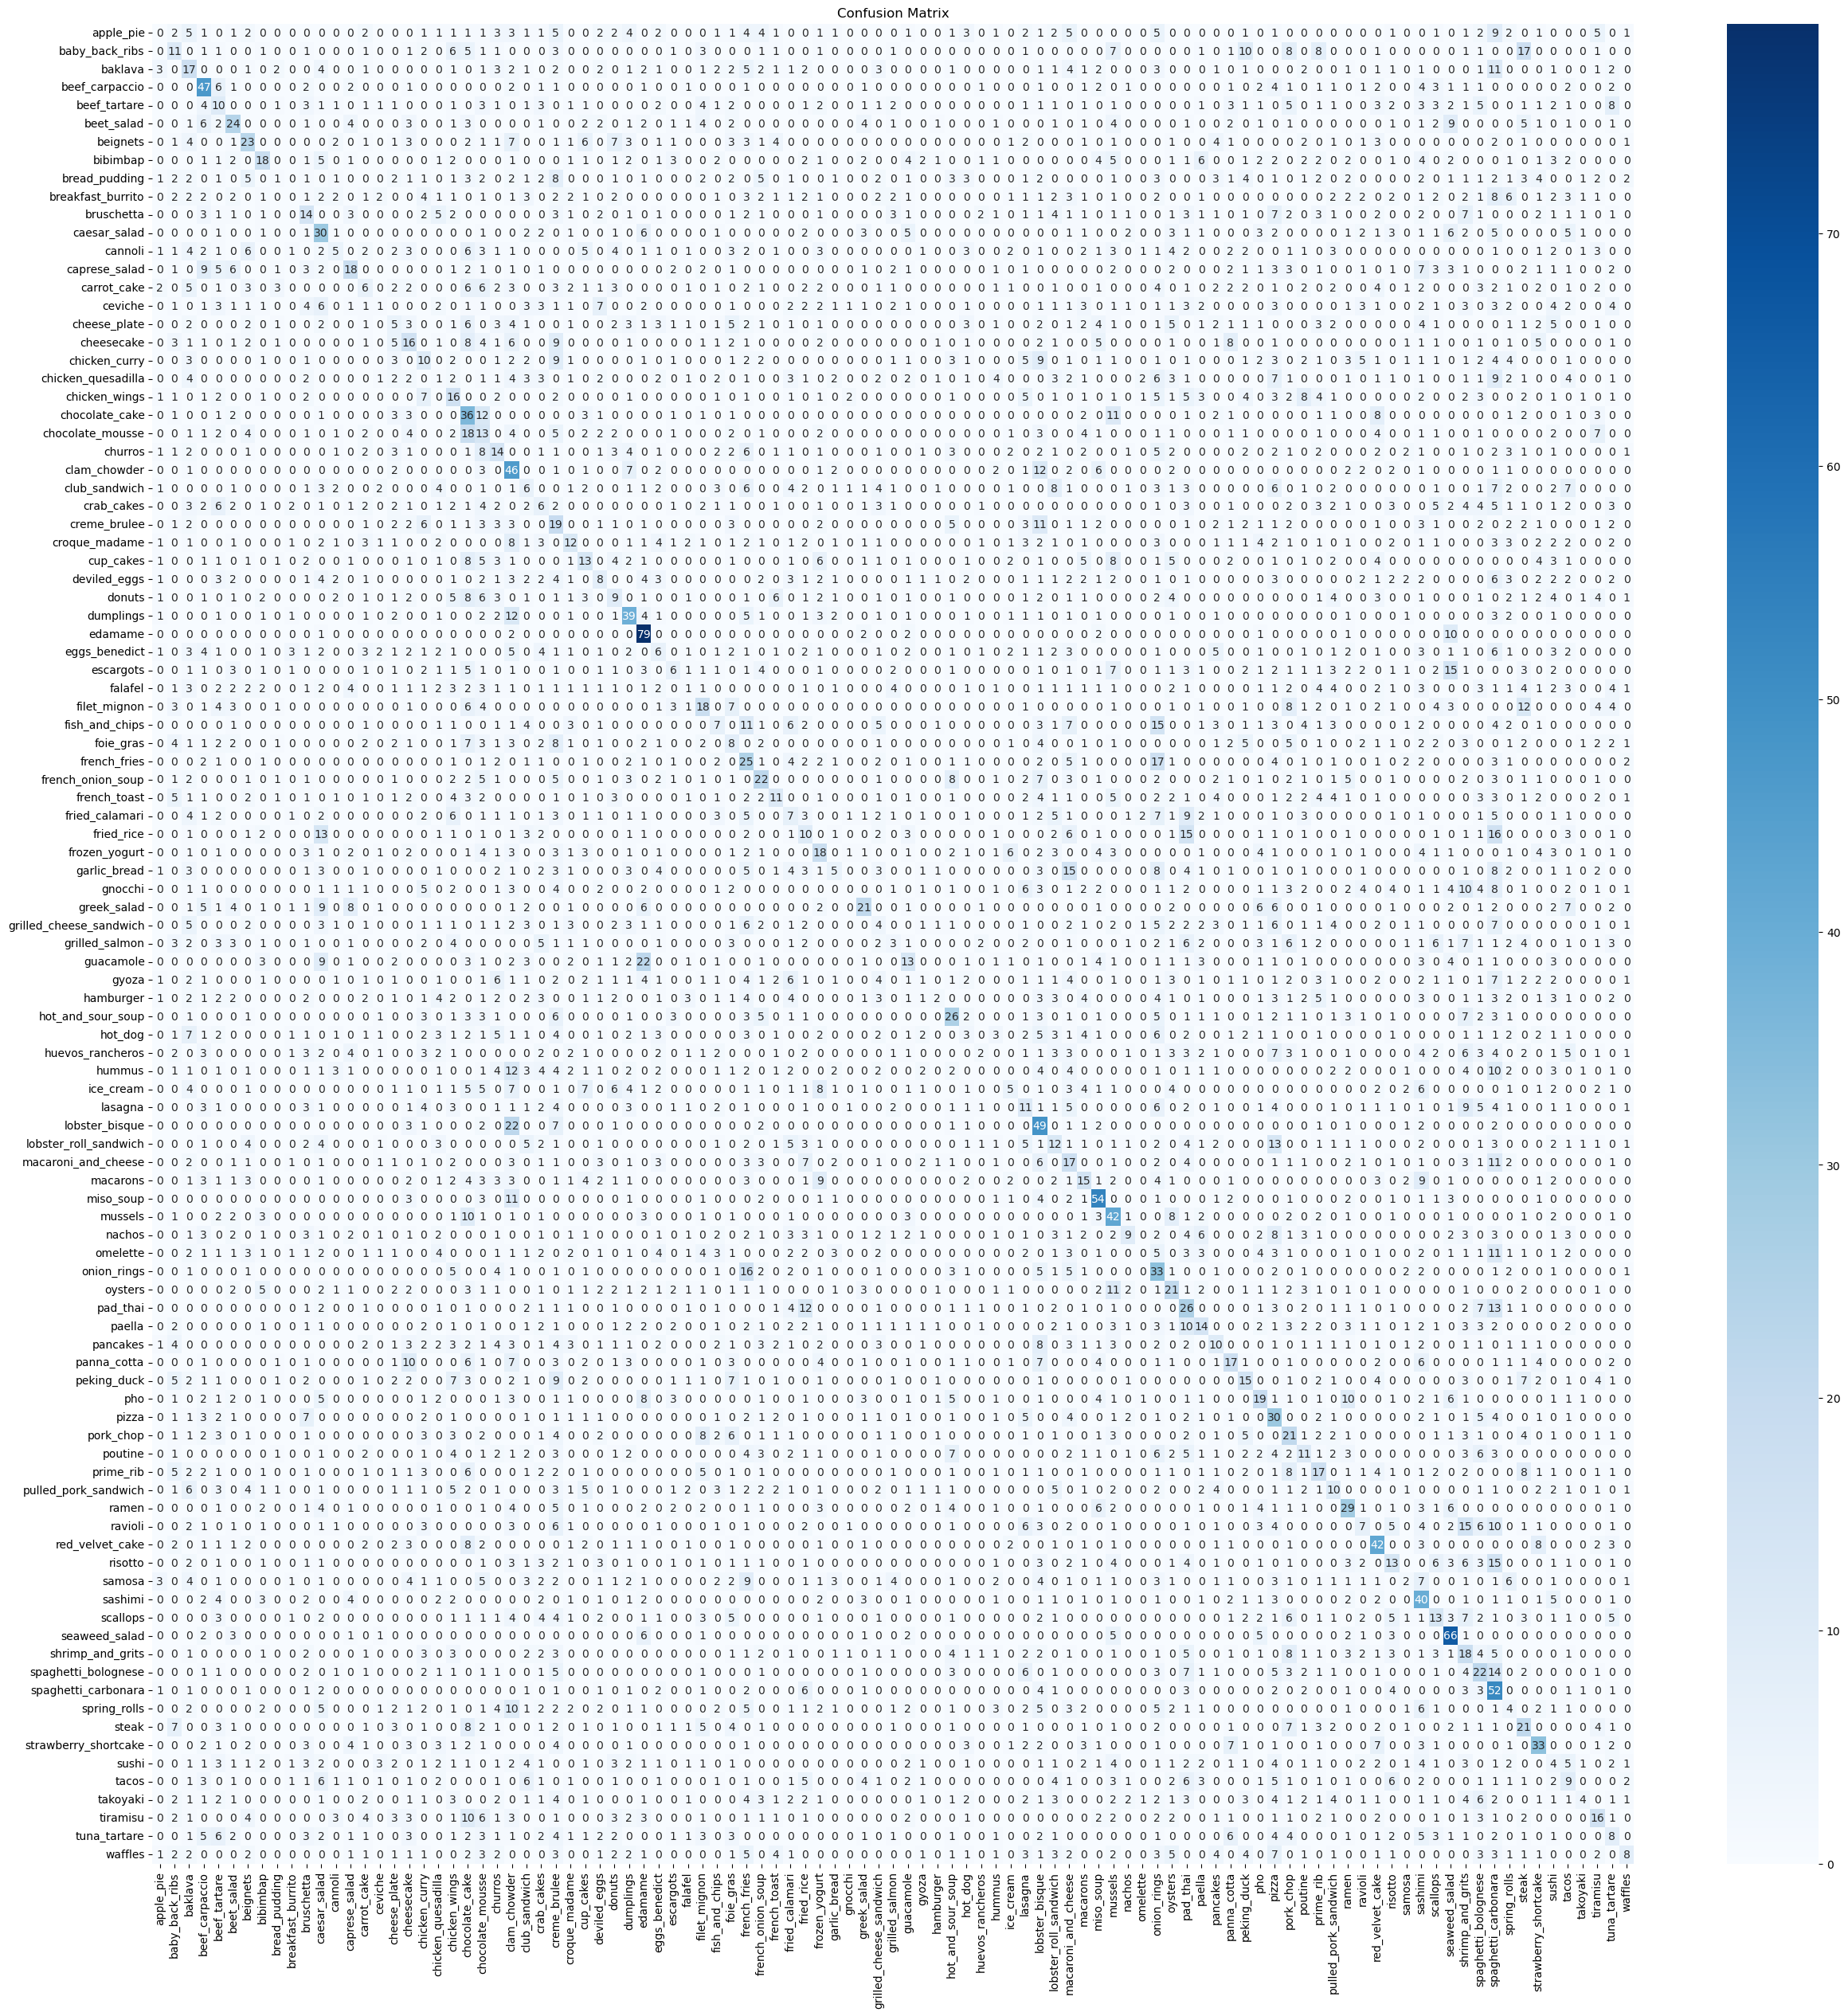

In [41]:
# Predict and plot confusion matrix
yp = model.predict(test_data).argmax(axis=1)
conf_matrix = confusion_matrix(test_data.classes, yp)

plt.figure(figsize=(30, 30))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.show()

In [75]:
macarons = load_img("C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images\\macarons\\397950.jpg",target_size=(224,224))
pizza = load_img("C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images\\pizza\\1870865.jpg",target_size=(224,224,3))
donuts = load_img("C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images\\donuts\\1065812.jpg",target_size=(224,224,3))
toast = load_img("C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images\\french_toast\\359128.jpg",target_size=(224,224,3))
ice = load_img("C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images\\ice_cream\\822123.jpg",target_size=(224,224))
fries = load_img("C:\\Users\\Soundous\\Desktop\\PRODIGY_ML_05\\food-101\\images\\french_fries\\2246621.jpg",target_size=(224,224))


Text(0.5, 1.0, 'Pizza')

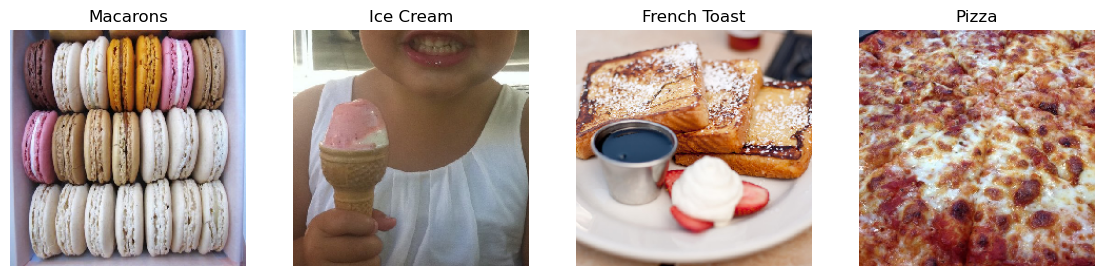

In [71]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 4, 1)
plt.axis('off')
plt.imshow(macarons)
plt.title("Macarons")
# _____________________________________________
fig.add_subplot(1, 4, 2)
plt.axis('off')
plt.imshow(ice)
plt.title("Ice Cream")
# _____________________________________________
fig.add_subplot(1, 4, 3)
plt.axis('off')
plt.imshow(toast)
plt.title("French Toast")
# _____________________________________________
fig.add_subplot(1, 4, 4)
plt.axis('off')
plt.imshow(pizza)
plt.title("Pizza")

In [77]:
macarons = img_to_array(macarons)
fries = img_to_array(fries)
ice = img_to_array(ice)
pizza = img_to_array(pizza)
donuts = img_to_array(donuts)
toast = img_to_array(toast)
macarons = macarons/255
fries = fries/255
ice = ice/255
pizza = pizza/255
donuts = donuts/255
toast = toast/255
macarons = macarons.reshape(1,224,224,3)
fries = fries.reshape(1,224,224,3)
ice = ice.reshape(1,224,224,3)
pizza = pizza.reshape(1,224,224,3)
donuts = donuts.reshape(1,224,224,3)
toast = toast.reshape(1,224,224,3)

macarons.shape

(1, 224, 224, 3)

In [83]:
p1 = (model.predict(macarons)).argmax()

print("Class ", p1, ": ", values[p1], sep='')
print(calories[p1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Class 31: donuts
Donuts: ~4 calories per gram


In [87]:
p2 = (model.predict(fries)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Class 40: french_fries
French Fries: ~3.5 calories per gram


In [89]:
p3 = (model.predict(ice)).argmax()

print("Class ",p3,": ",values[p3],sep='')
print(calories[p3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class 58: ice_cream
Ice Cream: ~2 calories per gram


In [91]:
p4 = (model.predict(pizza)).argmax()

print("Class ",p4,": ",values[p4],sep='')
print(calories[p4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Class 76: pizza
Pizza: ~2.5 calories per gram
